### Reading the data: RBA_KYC_Accounts_ALL_Ids.xlsx

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_excel('/Users/addisonpelayo/Desktop/RBA_KYC_Accounts_ALL_Ids.xlsx')

## Checking some details about the dataset

In [3]:
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


In [4]:
# Back up data frame
back_df = df.copy(deep=True)

In [5]:
back_df.rba_grade_desc.value_counts()

Low       159680
Medium     65099
High          89
Name: rba_grade_desc, dtype: int64

In [6]:
# df = back_df.copy(deep=True)

In [7]:
## To display all columns of data frame

pd.set_option("display.max_columns", 400)

## TO display all lines of execution
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## (rows, columns)
df.shape

(224868, 47)

In [5]:
## Columns and their data types
df.dtypes

org_code                        int64
branchCode                      int64
customerId                      int64
fullaccount                    object
customerType                    int64
creationDate                   object
onboarding                     object
residentStatus                  int64
residentCountry                object
nationalityOriginal            object
extraNationality               object
dateOfBirth                    object
age_in_year                   float64
birthCountry                  float64
birthPlace                     object
profession                    float64
companyType                   float64
giinCode                       object
lastUpdate                    float64
status                         object
ledgerCode                      int64
accountCurrency                object
jointAccount                    int64
IsBlackListed                   int64
CUS_CLASS                       int64
ECO_SEC                         int64
TYPE_OF_DEP 

# Exploratory Data Analysis for the Regression Model

## Target Variable

In [6]:
## rbaGradeAbrv, rba_grade_desc are the target variables for the classification model and rbaValue is the target variable for the regression model

target = "rbaValue"
df[target].head()

0    13.20
1    16.93
2    16.93
3    16.93
4    16.93
Name: rbaValue, dtype: float64

In [7]:
df[["rbaGradeAbrv", "rba_grade_desc", "rbaValue"]]

,rbaGradeAbrv,rba_grade_desc,rbaValue
0,L,Low,13.20
1,L,Low,16.93
2,L,Low,16.93
3,L,Low,16.93
4,L,Low,16.93
...,...,...,...
224863,L,Low,16.53
224864,M,Medium,57.60
224865,L,Low,14.53
224866,M,Medium,24.53


In [8]:
## Dropping rbaGradeAbrv and Risk Description till the classification model
df.drop(["rbaGradeAbrv", "rba_grade_desc"], inplace=True, axis=1)
df.columns

Index(['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality', 'dateOfBirth', 'age_in_year',
       'birthCountry', 'birthPlace', 'profession', 'companyType', 'giinCode',
       'lastUpdate', 'status', 'ledgerCode', 'accountCurrency', 'jointAccount',
       'IsBlackListed', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP', 'GENDER',
       'LEGAL_STA_CODE', 'legal_Stat_desc', 'avg_last_10_days',
       'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'date_of_assessment', 'score_card', 'score_card_Desc', 'rbaValue'],
      dtype='object')

Skewness: 1.379485
Kurtosis: 4.011235


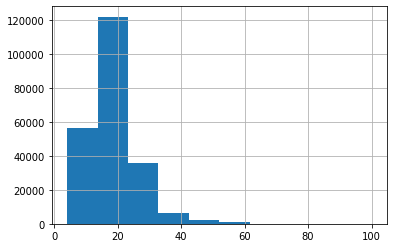

In [9]:
## Distribution of target variable (not balanced)

#skewness and kurtosis
print("Skewness: %f" % df[target].skew())
print("Kurtosis: %f" % df[target].kurt())
df[target].hist()

As we can see the data is not normally distributed. Several sklearn regression models assume a normal distribution, so to improve performance we apply log transformation for better results

Skewness: -0.525717
Kurtosis: 0.355863


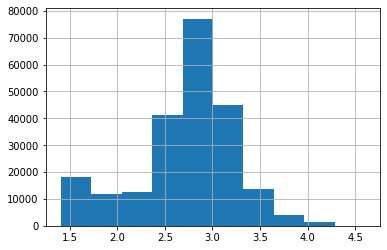

In [10]:
df['rbaValue_Log'] = np.log(df[target])

df["rbaValue_Log"].hist()
# skewness and kurtosis
print("Skewness: %f" % df['rbaValue_Log'].skew())
print("Kurtosis: %f" % df['rbaValue_Log'].kurt())

In [11]:
# dropping old column
df.drop(target, axis= 1, inplace=True)

In [12]:
df.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,...,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,score_card,score_card_Desc,rbaValue_Log
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,...,0,0.0,0,0.0,0,0.0,2019-01-24,E-Existing,NaN,2.580217
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,...,0,0.0,0,0.0,0,0.0,2019-01-24,I-Existing,NaN,2.829087
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,...,0,0.0,0,0.0,0,0.0,2019-01-24,I-Existing,NaN,2.829087
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,...,4,-550.0,1,50.0,1,50.0,2019-01-24,I-Existing,NaN,2.829087
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,...,4,-540.0,1,56.0,1,56.0,2019-01-24,I-Existing,NaN,2.829087


## Data Quality and Missing Data

### Missing data points

In [13]:
## Looking at the percentage of missing values in the dataset

null_percentage = pd.DataFrame(
    df.apply(lambda x: sum(x.isna()) / df.shape[0]).sort_values(ascending=False)
)
null_percentage.columns = ["Missing percentage"]
null_percentage

,Missing percentage
lastUpdate,1.000000
score_card_Desc,1.000000
legal_Stat_desc,1.000000
birthCountry,1.000000
giinCode,0.999947
extraNationality,0.992026
profession,0.645356
GENDER,0.535919
companyType,0.490483
birthPlace,0.097133


In [14]:
## Columns lastUpdate, score_card_Desc, legal_Stat_desc, birthCountry, giinCode, extraNationality are almost empty so we remove them

df.drop(["lastUpdate", "score_card_Desc", "legal_Stat_desc", "birthCountry", "giinCode", "extraNationality"], inplace=True, axis=1)
df.columns

Index(['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'dateOfBirth', 'age_in_year', 'birthPlace',
       'profession', 'companyType', 'status', 'ledgerCode', 'accountCurrency',
       'jointAccount', 'IsBlackListed', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP',
       'GENDER', 'LEGAL_STA_CODE', 'avg_last_10_days', 'avg_last_30_days',
       'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'date_of_assessment', 'score_card', 'rbaValue_Log'],
      dtype='object')

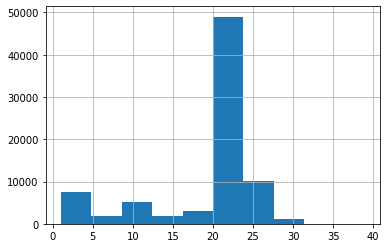

In [15]:
## Profession Column
df["profession"].value_counts()
df["profession"].hist()

## Missing values should be filled with mode

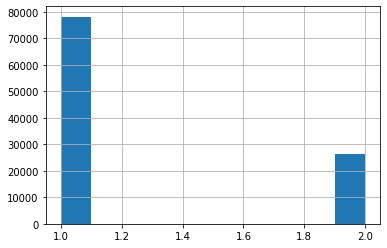

In [16]:
## GENDER Column
df["GENDER"].value_counts()
df["GENDER"].hist()

## Missing values should be filled with mode

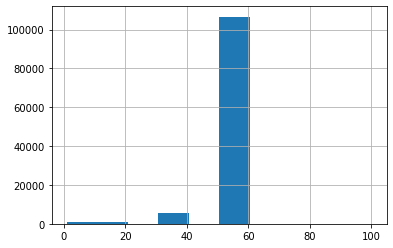

In [17]:
## companyType Column
df["companyType"].value_counts()
df["companyType"].hist()

## Missing values should be filled with mode

In [18]:
## birthPlace Column
df["birthPlace"].value_counts()

## Most of the data is garbage values ("?"). So we will drop this column.

????              76312
?????             38740
??????            29904
???????           19465
????????           7690
                  ...  
????? -?????          1
NEGRESTI              1
LAMBUNAO              1
AUCKLAND              1
??????- ?? ???        1
Name: birthPlace, Length: 1000, dtype: int64

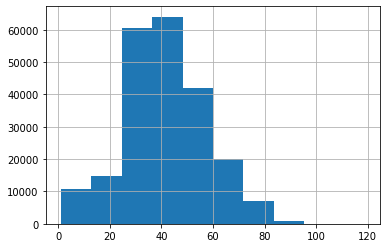

In [19]:
## age_in_year Column
df["age_in_year"].value_counts()
df["age_in_year"].skew() # median or mean ( -1 to 1 -> mean )
df["age_in_year"].hist()

## Missing values should be filled with mean (taking into consideration the skew value)

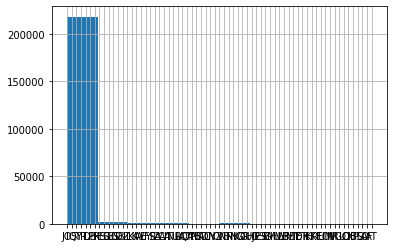

In [20]:
## nationalityOriginal Column
df["nationalityOriginal"].value_counts()
df["nationalityOriginal"].hist()

## Missing values should be filled with mode

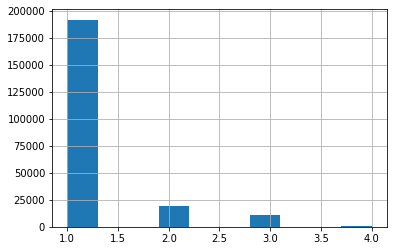

In [21]:
## LEGAL_STA_CODE Column
df["LEGAL_STA_CODE"].value_counts()
df["LEGAL_STA_CODE"].hist()

## Missing values should be filled with mode

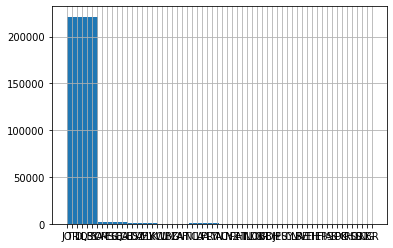

In [22]:
## residentCountry Column
df["residentCountry"].value_counts()
df["residentCountry"].hist()

## Missing values should be filled with mode

In [23]:
## Mode fills for missing values
cols_to_mode = ["profession", "GENDER", "companyType", "nationalityOriginal", "LEGAL_STA_CODE", "residentCountry"]
df[cols_to_mode]=df[cols_to_mode].fillna(df.mode().iloc[0])

In [24]:
## Dropping columns with garbage values
df.drop(["birthPlace"], inplace=True, axis=1)

In [25]:
## Dropping dateOfBirth because age_in_year is same in terms of meaningful data
df.drop(["dateOfBirth"], inplace=True, axis=1)

In [26]:
## Mean fills for missing values

df["age_in_year"]=df["age_in_year"].fillna(df["age_in_year"].mean())

In [27]:
null_percentage = pd.DataFrame(
    df.apply(lambda x: sum(x.isna()) / df.shape[0]).sort_values(ascending=False)
)
null_percentage.columns = ["Missing percentage"]
null_percentage

,Missing percentage
rbaValue_Log,0.0
IsBlackListed,0.0
accountCurrency,0.0
ledgerCode,0.0
status,0.0
companyType,0.0
profession,0.0
age_in_year,0.0
nationalityOriginal,0.0
residentCountry,0.0


### Finding and removing constant columns

In [28]:
## Find constant columns
df.columns[df.nunique()==1]

Index(['org_code', 'status', 'IsBlackListed', 'date_of_assessment'], dtype='object')

In [29]:
## Removing constant columns
df.drop(['org_code', 'status', 'IsBlackListed', 'date_of_assessment'], axis=1, inplace=True)

In [30]:
df.head()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,age_in_year,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue_Log
0,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,41.310575,...,0,0.0,0,0.0,0,0.0,0,0.0,E-Existing,2.580217
1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,30.000000,...,0,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087
2,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,30.000000,...,0,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087
3,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,30.000000,...,4,-550.0,4,-550.0,1,50.0,1,50.0,I-Existing,2.829087
4,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,30.000000,...,4,-540.0,4,-540.0,1,56.0,1,56.0,I-Existing,2.829087


### Removing identifier columns like branchCode, customerId, fullaccount

In [31]:
df["branchCode"].value_counts()
df["customerId"].value_counts()
df["fullaccount"].value_counts()

020902507770010010000    26
020301298000011316000    23
020301298000012957000    23
020301298000011306000    23
020301298000012969000    23
                         ..
020800819490011406010     1
020702061400011344317     1
040400736830011396000     1
020301003690013209000     1
070400218980011930000     1
Name: fullaccount, Length: 220434, dtype: int64

In [32]:
df.drop(["branchCode", "customerId", "fullaccount"], axis=1, inplace=True)

In [33]:
df.head()

,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,age_in_year,profession,companyType,ledgerCode,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue_Log
0,2,2015-04-05,N,1,JO,JO,41.310575,20.0,35.0,5817,...,0,0.0,0,0.0,0,0.0,0,0.0,E-Existing,2.580217
1,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,1330,...,0,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087
2,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,1389,...,0,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087
3,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,60,...,4,-550.0,4,-550.0,1,50.0,1,50.0,I-Existing,2.829087
4,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,10,...,4,-540.0,4,-540.0,1,56.0,1,56.0,I-Existing,2.829087


### Creating new variables and transformations

In [38]:
# Backup data frame
bk_df = df.copy(deep=True)

In [99]:
# df = bk_df

In [100]:
max_val = pd.to_datetime(df["creationDate"]).max()
max_val

Timestamp('2018-10-21 00:00:00')

In [34]:
df.head()

,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,age_in_year,profession,companyType,ledgerCode,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue_Log
0,2,2015-04-05,N,1,JO,JO,41.310575,20.0,35.0,5817,...,0,0.0,0,0.0,0,0.0,0,0.0,E-Existing,2.580217
1,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,1330,...,0,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087
2,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,1389,...,0,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087
3,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,60,...,4,-550.0,4,-550.0,1,50.0,1,50.0,I-Existing,2.829087
4,1,2013-09-17,N,1,JO,JO,30.000000,27.0,51.0,10,...,4,-540.0,4,-540.0,1,56.0,1,56.0,I-Existing,2.829087


In [35]:
# Creating variable creation date in days to represent creation date in number of days (int) form

df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]')
df['creationDate_indays'] = df["creationDate_indays"].dt.days
df['creationDate_indays'].head()

0    1295
1    1860
2    1860
3    1860
4    1860
Name: creationDate_indays, dtype: int64

In [36]:
## Dropping creationDate variable as we have transformed it into creation_date_in_days

df.drop(["creationDate"], axis=1, inplace=True)

### Variable transformations

In [37]:
## Transformations for onboarding from categorical to numerical variable

df["onboarding"].replace(to_replace="N", value=0, inplace=True)
df["onboarding"].replace(to_replace="Y", value=1, inplace=True)
df.head()

,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,age_in_year,profession,companyType,ledgerCode,accountCurrency,...,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue_Log,creationDate_indays
0,2,0,1,JO,JO,41.310575,20.0,35.0,5817,JOD,...,0.0,0,0.0,0,0.0,0,0.0,E-Existing,2.580217,1295
1,1,0,1,JO,JO,30.000000,27.0,51.0,1330,JOD,...,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087,1860
2,1,0,1,JO,JO,30.000000,27.0,51.0,1389,JOD,...,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087,1860
3,1,0,1,JO,JO,30.000000,27.0,51.0,60,JOD,...,-550.0,4,-550.0,1,50.0,1,50.0,I-Existing,2.829087,1860
4,1,0,1,JO,JO,30.000000,27.0,51.0,10,JOD,...,-540.0,4,-540.0,1,56.0,1,56.0,I-Existing,2.829087,1860


In [38]:
## Number of unique values in each categorical variable

df.select_dtypes(exclude=["float64", "int64"]).nunique().sort_values(ascending=False)

nationalityOriginal    67
residentCountry        62
accountCurrency        20
score_card              4
dtype: int64

In [39]:
df.shape

(224868, 30)

In [40]:
df.columns

Index(['customerType', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'age_in_year', 'profession', 'companyType',
       'ledgerCode', 'accountCurrency', 'jointAccount', 'CUS_CLASS', 'ECO_SEC',
       'TYPE_OF_DEP', 'GENDER', 'LEGAL_STA_CODE', 'avg_last_10_days',
       'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'score_card', 'rbaValue_Log', 'creationDate_indays'],
      dtype='object')

### Numerical and Categorical features

In [41]:
numerical_feats = ["age_in_year", "avg_last_10_days", "avg_last_30_days", "avg_last_90_days", "number_of_cash_dep_90_days", "avg_cash_deposit_90_days", "number_of_deposit_90_days", "avg_of_dep_90_days", "number_of_cash_wd_90_days", "avg_of_cash_wd_90_days", "number_of_wd_90_days", "avg_of_wd_90_days", "creationDate_indays"]
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = ["customerType", "onboarding", "residentStatus", "residentCountry", "nationalityOriginal", "profession", "companyType", "ledgerCode", "accountCurrency", "jointAccount", "CUS_CLASS", "ECO_SEC", "TYPE_OF_DEP", "GENDER", "LEGAL_STA_CODE", "score_card",]
print("Number of Categorical features: ", len(categorical_feats))

target = "rbaValue_Log"
print("Target Variable: ", target)

Number of Numerical features:  13
Number of Categorical features:  16
Target Variable:  rbaValue_Log


In [42]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['age_in_year', 'avg_last_10_days', 'avg_last_30_days',
       'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'creationDate_indays'],
      dtype='object')
****************************************************************************************************
Index(['customerType', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'profession', 'companyType', 'ledgerCode',
       'accountCurrency', 'jointAccount', 'CUS_CLASS', 'ECO_SEC',
       'TYPE_OF_DEP', 'GENDER', 'LEGAL_STA_CODE', 'score_card'],
      dtype='object')


In [110]:
df[numerical_feats].head()
df[categorical_feats].head()

,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,creationDate_indays
0,41.310575,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,1295
1,30.000000,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,1860
2,30.000000,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,1860
3,30.000000,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,1860
4,30.000000,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,1860


,customerType,onboarding,residentStatus,residentCountry,nationalityOriginal,profession,companyType,ledgerCode,accountCurrency,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,score_card
0,2,0,1,JO,JO,20.0,35.0,5817,JOD,0,4,46,35,1.0,2.0,E-Existing
1,1,0,1,JO,JO,27.0,51.0,1330,JOD,0,2,90,23,2.0,1.0,I-Existing
2,1,0,1,JO,JO,27.0,51.0,1389,JOD,0,2,90,23,2.0,1.0,I-Existing
3,1,0,1,JO,JO,27.0,51.0,60,JOD,0,2,90,23,2.0,1.0,I-Existing
4,1,0,1,JO,JO,27.0,51.0,10,JOD,0,2,90,23,2.0,1.0,I-Existing


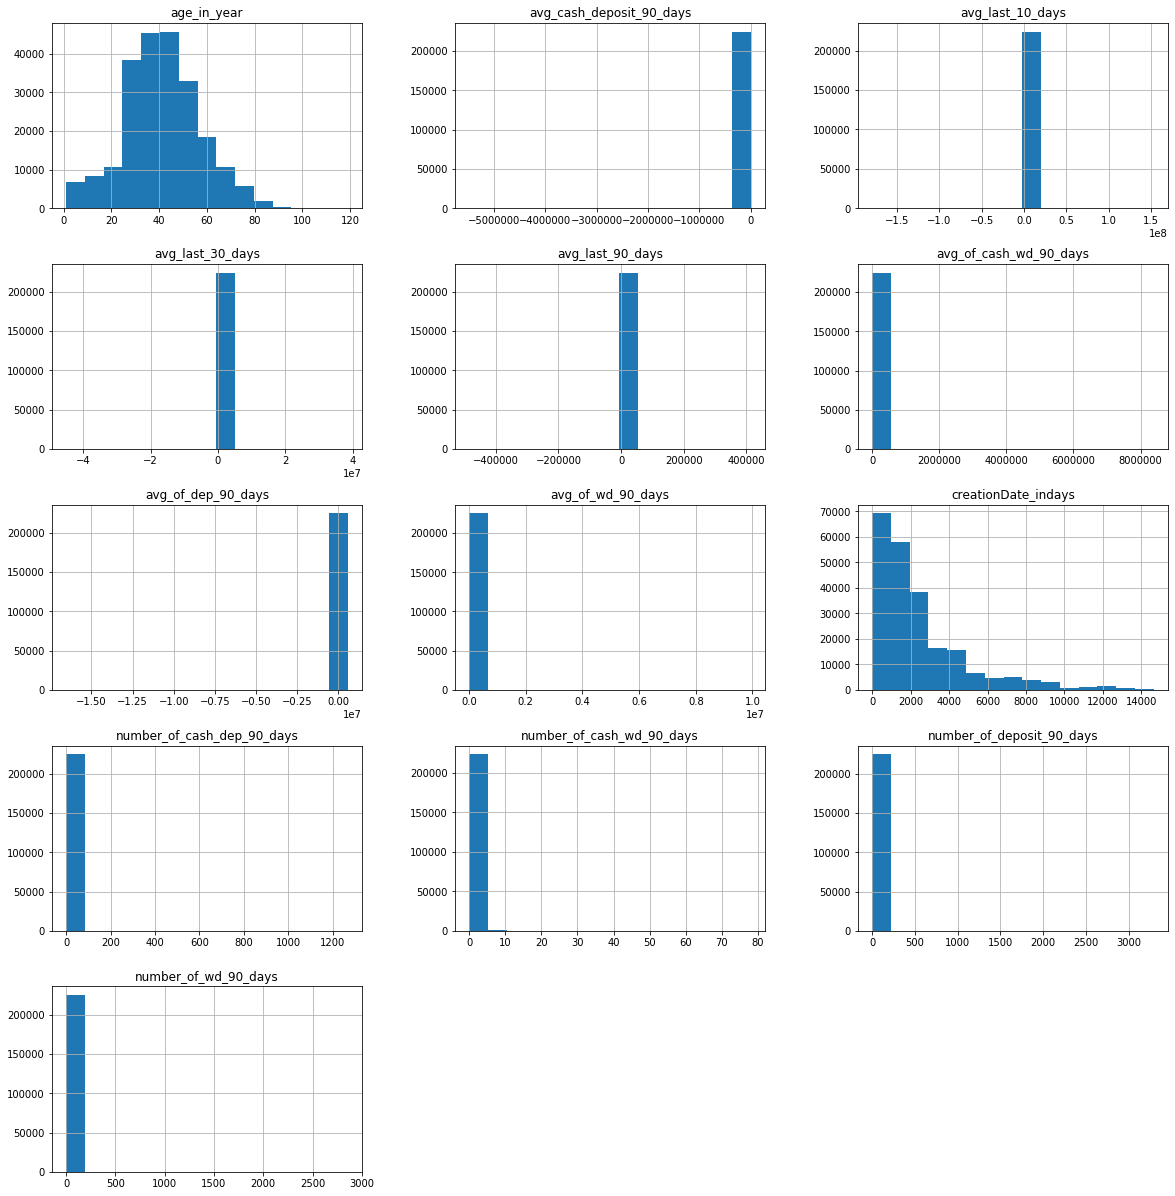

In [43]:
## Plots for all numerical features

df[numerical_feats].hist(bins=15, figsize=(20, 30), layout=(7, 3));

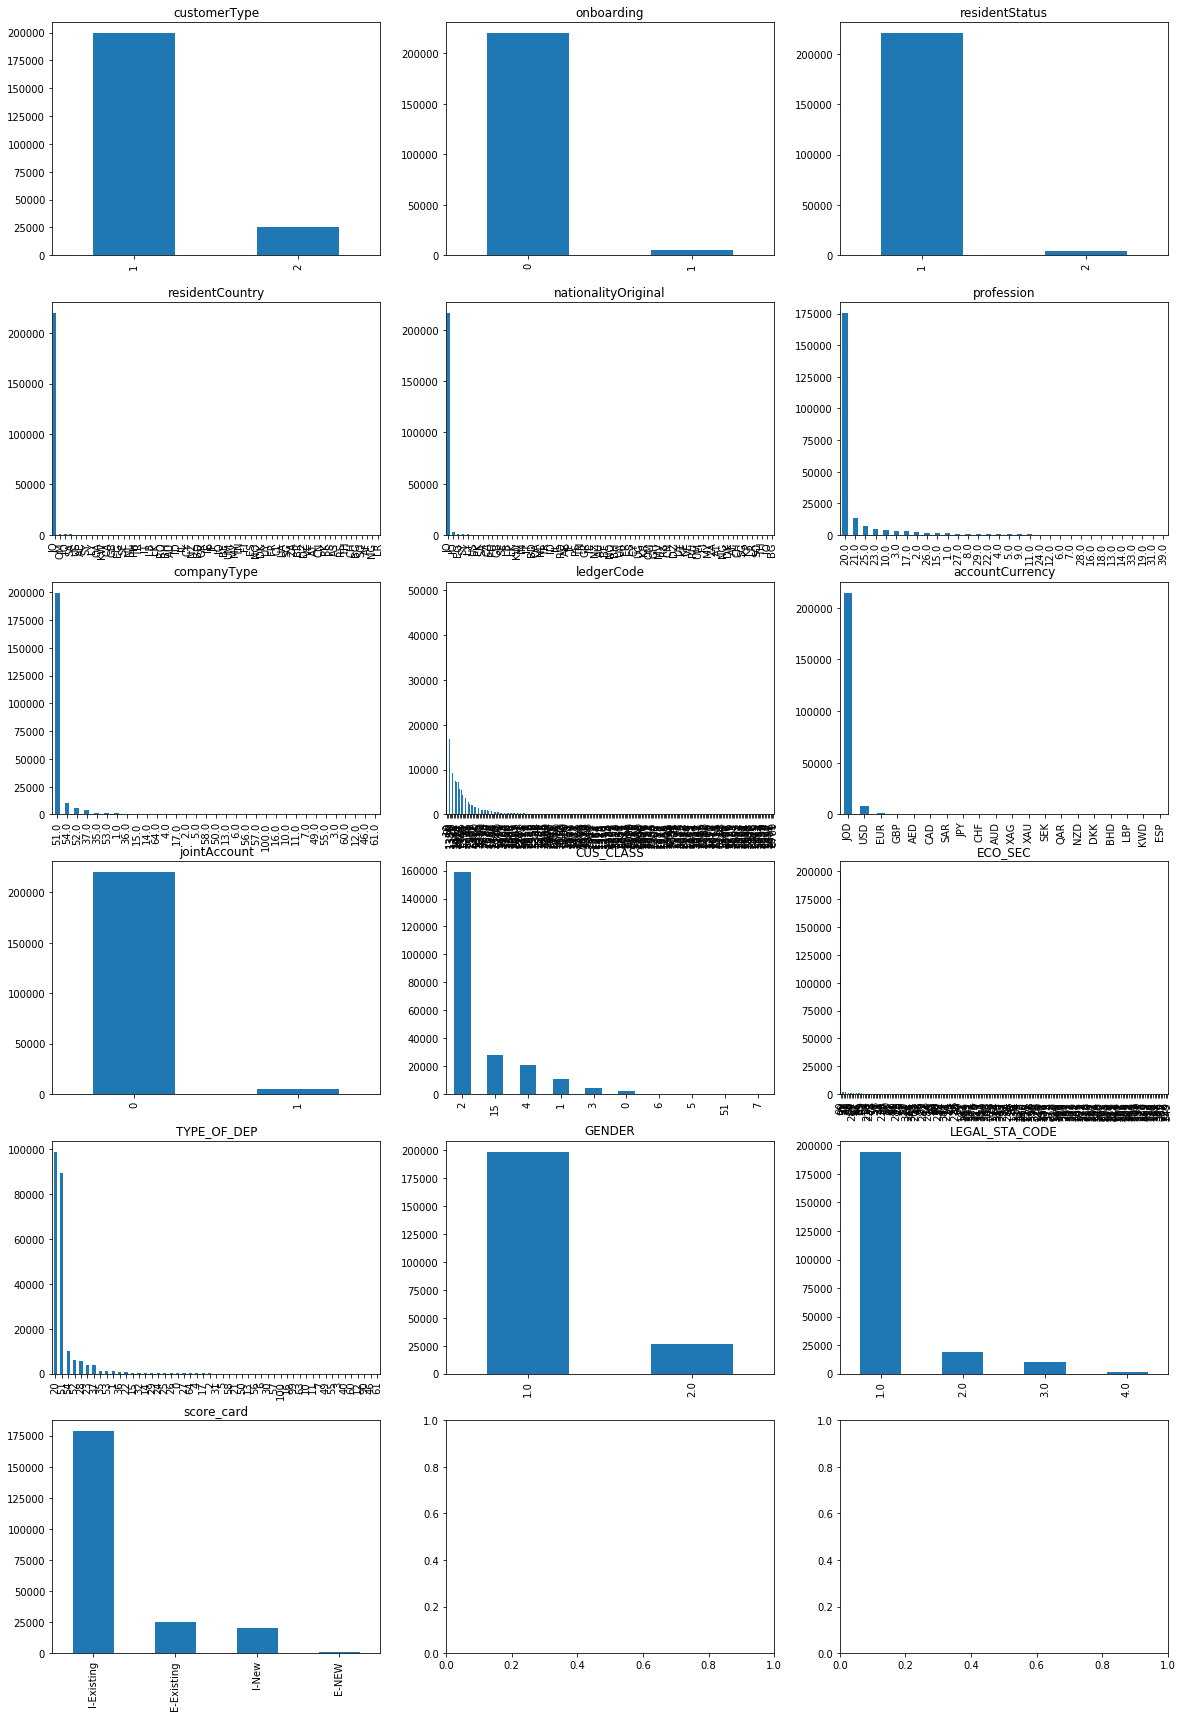

In [44]:
%matplotlib inline
nrows = 6
ncols = 3
fig, axes = plt.subplots(figsize=(20, 30), nrows=nrows, ncols=ncols)

i = 0
flag = False
for r in range(nrows):
    for c in range(ncols):
        df[categorical_feats[i]].value_counts().plot(ax=axes[r][c], kind='bar', title=categorical_feats[i])
        i += 1
        if(i>=len(categorical_feats)):
            flag = True
            break
    if flag:
        break

In [45]:
## Dropping categorical variables with too many labels
## Also most of these variables have unbalanced data

cols_to_drop = ["residentCountry", "nationalityOriginal", "profession", "companyType", "ledgerCode", "accountCurrency", "ECO_SEC", "TYPE_OF_DEP"]
df.drop(cols_to_drop, axis=1, inplace=True)
df.columns

Index(['customerType', 'onboarding', 'residentStatus', 'age_in_year',
       'jointAccount', 'CUS_CLASS', 'GENDER', 'LEGAL_STA_CODE',
       'avg_last_10_days', 'avg_last_30_days', 'avg_last_90_days',
       'number_of_cash_dep_90_days', 'avg_cash_deposit_90_days',
       'number_of_deposit_90_days', 'avg_of_dep_90_days',
       'number_of_cash_wd_90_days', 'avg_of_cash_wd_90_days',
       'number_of_wd_90_days', 'avg_of_wd_90_days', 'score_card',
       'rbaValue_Log', 'creationDate_indays'],
      dtype='object')

In [46]:
categorical_feats = ['customerType', 'onboarding', 'residentStatus', 'jointAccount', 'CUS_CLASS', 'GENDER', 'LEGAL_STA_CODE', 'score_card']

In [47]:
df["GENDER"] = df["GENDER"].astype(int)
df["LEGAL_STA_CODE"] = df["LEGAL_STA_CODE"].astype(int)

In [48]:
df

,customerType,onboarding,residentStatus,age_in_year,jointAccount,CUS_CLASS,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,...,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue_Log,creationDate_indays
0,2,0,1,41.310575,0,4,1,2,8610000.00,2170000.00,...,0.0,0,0.0,0,0.0,0,0.0,E-Existing,2.580217,1295
1,1,0,1,30.000000,0,2,2,1,0.00,0.00,...,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087,1860
2,1,0,1,30.000000,0,2,2,1,-137562.72,-34672.52,...,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.829087,1860
3,1,0,1,30.000000,0,2,2,1,2079.79,526.87,...,-550.0,4,-550.0,1,50.0,1,50.0,I-Existing,2.829087,1860
4,1,0,1,30.000000,0,2,2,1,444.00,120.50,...,-540.0,4,-540.0,1,56.0,1,56.0,I-Existing,2.829087,1860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224863,1,0,1,66.000000,0,2,1,1,82249.30,20728.80,...,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.805177,364
224864,2,0,1,13.000000,0,4,1,3,111388.80,28073.60,...,0.0,0,0.0,0,0.0,0,0.0,E-Existing,4.053523,5199
224865,1,0,1,41.000000,0,2,1,1,6597.29,1662.73,...,0.0,0,0.0,0,0.0,0,0.0,I-Existing,2.676215,6633
224866,1,0,1,70.000000,0,2,2,1,-110.01,-18.34,...,0.0,0,0.0,0,0.0,0,0.0,I-Existing,3.199897,3931


## Preprocessing

### Label encoding

In [49]:
encoded_df = df.copy(deep=True)

In [50]:
from sklearn.preprocessing import LabelEncoder 

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [51]:
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 

# Encode labels in columns "LEGAL_STA_CODE", "score_card" 
encoded_df['CUS_CLASS']= label_encoder.fit_transform(encoded_df['CUS_CLASS']) 
encoded_df['score_card']= label_encoder.fit_transform(encoded_df['score_card'])
  
encoded_df['CUS_CLASS'].unique() 
encoded_df['score_card'].unique() 

array([0, 2, 3, 1])

### One-Hot Encoding

It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column.

In [52]:
encoded_df = pd.get_dummies(data=encoded_df, columns=categorical_feats)
encoded_df.head()

,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,...,GENDER_1,GENDER_2,LEGAL_STA_CODE_1,LEGAL_STA_CODE_2,LEGAL_STA_CODE_3,LEGAL_STA_CODE_4,score_card_0,score_card_1,score_card_2,score_card_3
0,41.310575,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
1,30.000000,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,...,0,1,1,0,0,0,0,0,1,0
2,30.000000,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,...,0,1,1,0,0,0,0,0,1,0
3,30.000000,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,...,0,1,1,0,0,0,0,0,1,0
4,30.000000,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,...,0,1,1,0,0,0,0,0,1,0


In [53]:
encoded_df.shape

(224868, 42)

### Scaling

Scaling helps to normalise the data and several sklearn models converge faster on scaled data.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
## Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [56]:
## Function to get specific columns ignoring columns with specified data types (to_ignore) and ignoring 
## the target variable

def get_specific_columns(df, data_type, to_ignore=list(), ignore_target=False):
    columns = df.select_dtypes(include=data_type).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return columns

In [57]:
variables = get_specific_columns(encoded_df, ["float64", "int64"], [target], ignore_target=True)

for v in variables:
    encoded_df[v] = scaler.fit_transform(encoded_df[[v]])

In [58]:
encoded_df.head()

,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,...,GENDER_1,GENDER_2,LEGAL_STA_CODE_1,LEGAL_STA_CODE_2,LEGAL_STA_CODE_3,LEGAL_STA_CODE_4,score_card_0,score_card_1,score_card_2,score_card_3
0,4.488055e-16,6.491650,6.482677,6.326798,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,...,1,0,0,1,0,0,1,0,0,0
1,-7.144184e-01,-0.005911,-0.005947,-0.005121,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,...,0,1,1,0,0,0,0,0,1,0
2,-7.144184e-01,-0.109723,-0.109623,-0.105476,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,...,0,1,1,0,0,0,0,0,1,0
3,-7.144184e-01,-0.004341,-0.004372,-0.003308,0.657625,0.018607,0.145511,0.032676,0.634319,-0.021024,...,0,1,1,0,0,0,0,0,1,0
4,-7.144184e-01,-0.005576,-0.005587,-0.004863,0.657625,0.018937,0.145511,0.032785,0.634319,-0.020728,...,0,1,1,0,0,0,0,0,1,0


In [59]:
encoded_df.shape

(224868, 42)

## Creating Training and Test datasets

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
## Splitting our dataset - test - .33% - train - .67%

df_train, df_test = train_test_split(encoded_df, test_size=0.33, random_state=88)

## Model Building

In [133]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [134]:
x_train = df_train.drop(target, axis=1)
x_train = x_train.iloc[:].values
y_train = df_train[target].values

x_test = df_test.drop(target, axis=1)
x_test = x_test.iloc[:].values
y_test = df_test[target].values

In [135]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
y_pred=regressor.predict(x_test)

In [137]:
y_pred

array([2.68641476, 2.5289793 , 2.73506172, ..., 2.68604134, 2.74912713,
       2.79209942])

For Linear Regression the most important model performance metrics are <br>
R2 Score , RMSE value and Mean Absolute Percentage Error (MAPE).<br>
The closer R2 Score is to 1 the more accurate our model.<br>
RMSE value and MAPE value should be low for a good model.</h4>

In [138]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 10)

Mean squared error: 0.19
Coefficient of determination: 0.25
Mean Absolute Error: 0.3133844721615624
Root Mean Squared Error: 0.4309654354140278
Mean Absolute Percentage Error: 1.2978261102661823


In [139]:
df[target].describe()

count    224868.000000
mean          2.756006
std           0.495051
min           1.406097
25%           2.590017
50%           2.805177
75%           3.060115
max           4.605170
Name: rbaValue_Log, dtype: float64

In [140]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,2.875258,2.686415
1,2.875258,2.528979
2,2.805177,2.735062
3,3.060115,2.938102
4,1.935860,3.045370
...,...,...
74202,2.676215,2.729643
74203,2.982140,2.690978
74204,2.676215,2.686041
74205,2.805177,2.749127


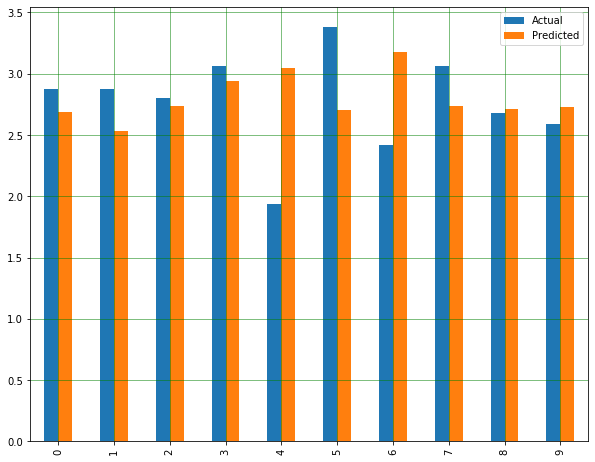

In [141]:
## Plotting 10 records of actual and predicted values

result1 = result[:10]
result1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Binary Classification Model

In [142]:
encoded_df

,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue_Log,creationDate_indays,customerType_1,customerType_2,onboarding_0,onboarding_1,residentStatus_1,residentStatus_2,jointAccount_0,jointAccount_1,CUS_CLASS_0,CUS_CLASS_1,CUS_CLASS_2,CUS_CLASS_3,CUS_CLASS_4,CUS_CLASS_5,CUS_CLASS_6,CUS_CLASS_7,CUS_CLASS_8,CUS_CLASS_9,GENDER_1,GENDER_2,LEGAL_STA_CODE_1,LEGAL_STA_CODE_2,LEGAL_STA_CODE_3,LEGAL_STA_CODE_4,score_card_0,score_card_1,score_card_2,score_card_3
0,4.488055e-16,6.491650,6.482677,6.326798,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.580217,-0.466355,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,-7.144184e-01,-0.005911,-0.005947,-0.005121,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,-7.144184e-01,-0.109723,-0.109623,-0.105476,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,-7.144184e-01,-0.004341,-0.004372,-0.003308,0.657625,0.018607,0.145511,0.032676,0.634319,-0.021024,0.010626,-0.041255,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,-7.144184e-01,-0.005576,-0.005587,-0.004863,0.657625,0.018937,0.145511,0.032785,0.634319,-0.020728,0.010626,-0.041152,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224863,1.559477e+00,0.056159,0.056035,0.055378,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.805177,-0.852615,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
224864,-1.788202e+00,0.078149,0.077997,0.076797,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,4.053523,1.153362,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
224865,-1.961708e-02,-0.000932,-0.000975,-0.000269,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.676215,1.748310,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
224866,1.812132e+00,-0.005994,-0.006002,-0.005121,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,3.199897,0.627286,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


### Adding back Risk Description

In [143]:
encoded_df["Risk_Description"] = back_df["rba_grade_desc"]

In [144]:
## Target Variable

target = "Risk_Description"
encoded_df[target].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [145]:
### Replacing High and Medium values with 1 and Low value with 0

encoded_df[target].replace(to_replace="Low", value=0, inplace=True)
encoded_df[target].replace(to_replace="Medium", value=1, inplace=True)
encoded_df[target].replace(to_replace="High", value=1, inplace=True)

0    159680
1     65188
Name: Risk_Description, dtype: int64

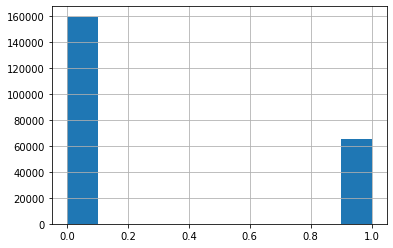

In [146]:
encoded_df[target].value_counts()
encoded_df[target].hist()

In [147]:
encoded_df.drop(["rbaValue_Log"], axis=1, inplace=True)

## Creating Training and Test datasets

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
## Splitting our dataset - test - .33% - train - .67%

df_train, df_test = train_test_split(encoded_df, test_size=0.33, random_state=88)

In [150]:
x_train = df_train.drop(target, axis=1)
x_train = x_train.iloc[:].values
y_train = df_train[target].values

x_test = df_test.drop(target, axis=1)
x_test = x_test.iloc[:].values
y_test = df_test[target].values

## Model Building

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [152]:
lr = LogisticRegression(max_iter=9000)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=9000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Performace Metrics

In [153]:
# Classification Accuracy

accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", accuracy)

Accuracy:  0.7690110097430162


In [154]:
# Null Accuracy - Accuracy of a model which always predicts 0

max(y_test.mean(), 1 - y_test.mean())

0.7098925977333674

This means that a dumb model that always predicts 0 would be right 71% of the time. So our model accuracy is not that good. Also accuracy is a good metric if the dataset is balanced.

In [155]:
# Calculating the confusion matrix 
# Saving confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred_lr)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(f"Confusion matrix:\n{confusion}")


# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[49860  2819]
 [14322  7206]]

Normalized confusion matrix:
[0.94648722 0.05351278]
[0.66527313 0.33472687]


<p>Example confusion matrix: </p>

<img src="https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/09_confusion_matrix_1.png">

## Metrics computed from a confusion matrix

In [156]:
## Classification Accuracy

print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred_lr))

0.7690110097430162
0.7690110097430162


In [157]:
## Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, y_pred_lr))

0.23098899025698386
0.23098899025698383


In [158]:
## Sensitivity

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, y_pred_lr))

0.334726867335563
0.334726867335563


In [94]:
## Specificity

specificity = TN / (TN + FP)

print(specificity)

0.9464872150192677


In [95]:
## False Positive Rate

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.05351278498073236
0.05351278498073231


In [96]:
## Precision

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_pred_lr))

0.7188029925187033
0.7188029925187033


<p>The confusion matrix is a more accurate metric for model performance. We can decide whether our model is ideal or not based on which sections of the confusion matrix we want to maximize. For example, in health related predictions false positives should be minimum.</p>